## Pytorch Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

In [3]:
array = [[1,2,3],[4,5,6]]

tensor = torch.Tensor(array)
print('Array type: {}'.format(tensor.type))
print('Array shape: {}'.format(tensor.shape))
print(tensor)

Array type: <built-in method type of Tensor object at 0x129f68140>
Array shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
print(torch.ones((2,3)))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
print(torch.rand(1,2))

tensor([[0.8899, 0.2093]])


In [9]:
print('Addition: {}'.format(torch.add(tensor, tensor)))
print('Substraction: {}'.format(tensor.sub(tensor)))
print('Multiplication: {}'.format(torch.mul(tensor, tensor)))

Addition: tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])
Substraction: tensor([[0., 0., 0.],
        [0., 0., 0.]])
Multiplication: tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])


In [10]:
print('Mean: {}'.format(tensor.mean()))
print('Std: {}'.format(tensor.std()))

Mean: 3.5
Std: 1.8708287477493286


In [11]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)

In [12]:
var

tensor([1., 1., 1.], requires_grad=True)

In [14]:
# backward propagation
array = [4,6]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad=True)
y = x**2
print(' y = ',y)

o = (1/2)*sum(y)
print(" o =  ",o)

o.backward()

print('gradients: ',x.grad)

 y =  tensor([16., 36.], grad_fn=<PowBackward0>)
 o =   tensor(26., grad_fn=<MulBackward0>)
gradients:  tensor([4., 6.])


### Linear Regression

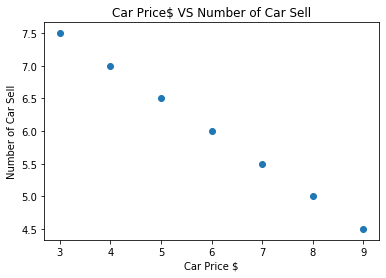

In [15]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [16]:
import torch.nn as nn

In [17]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)

In [18]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

epoch 0, loss 8.092588424682617
epoch 50, loss 4.9443840980529785
epoch 100, loss 3.3411266803741455
epoch 150, loss 2.257739543914795
epoch 200, loss 1.5256487131118774
epoch 250, loss 1.030945897102356
epoch 300, loss 0.696653425693512
epoch 350, loss 0.4707579016685486
epoch 400, loss 0.31811144948005676
epoch 450, loss 0.21496108174324036
epoch 500, loss 0.14525794982910156
epoch 550, loss 0.0981568768620491
epoch 600, loss 0.06632854789495468
epoch 650, loss 0.044820792973041534
epoch 700, loss 0.03028744086623192
epoch 750, loss 0.020466217771172523
epoch 800, loss 0.013830038718879223
epoch 850, loss 0.009345526807010174
epoch 900, loss 0.006315260194242001
epoch 950, loss 0.004267377313226461
epoch 1000, loss 0.002883702516555786


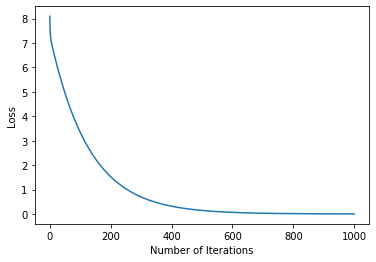

In [20]:
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

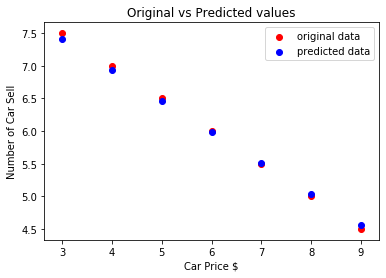

In [21]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()